In [1]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack

# NOTE:  Before running code below, download the following:  nltk.download('punkt')
# nltk.download('punkt')


In [3]:
# Read in Cleaned Movie data
movies = pd.read_csv('../csv/movies_data_cleaned.csv')
movies.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,runtime,vote_average,vote_count,credits,keywords,poster_path,recommendations
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,9366.788,20th Century Studios-Lightstorm Entertainment,2022-12-14,192.0,7.751,6748.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,183392-111332-702432-505642-1064215-436270-874...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,103.0,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,594767,Shazam! Fury of the Gods,Action-Comedy-Fantasy,en,Billy Batson and his foster siblings who trans...,5759.074,New Line Cinema-The Safran Company-DC Films-Wa...,2023-03-15,130.0,6.840,1355.0,Zachary Levi-Asher Angel-Jack Dylan Grazer-Ada...,superhero-end of the world-super power-aftercr...,/2VK4d3mqqTc7LVZLnLPeRiPaJ71.jpg,700391-994751-948713-640146-502356-938992-7660...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4704.903,Marvel Studios-Kevin Feige Productions,2023-02-15,125.0,6.448,1547.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/ngl2FKBlU4fhbdsrtdom9LVLBXw.jpg,965839-734048-267805-1035806-823999-842942-772...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,116.0,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,965839-267805-943822-842942-1035806-823999-107...


In [7]:
# Print out unique genres
unique_values = movies['genres'].unique()
unique_values

array(['Science Fiction-Adventure-Action', 'Horror-Mystery-Thriller',
       'Action-Comedy-Fantasy', ..., 'Romance-Documentary-Drama',
       'Crime-Adventure-Action', 'Mystery-Documentary'], dtype=object)

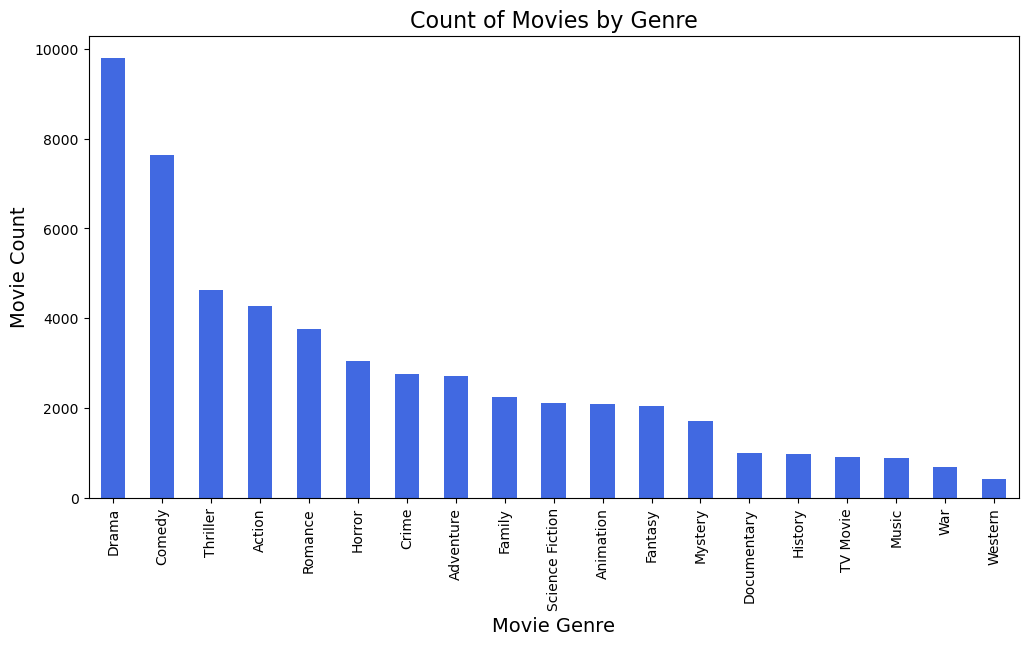

In [9]:
# Create DataFrame with genre counts
genre_counts = movies['genres'].str.split('-').explode().value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar',color="royalblue")
plt.title('Count of Movies by Genre', fontsize=16)
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Movie Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [10]:
# Group by vote_average and get counts
vote_average_counts = movies['vote_average'].value_counts()
vote_average_counts

6.700    834
6.500    832
6.800    825
6.600    810
6.200    802
        ... 
5.902      1
6.694      1
5.505      1
5.824      1
0.600      1
Name: vote_average, Length: 2335, dtype: int64

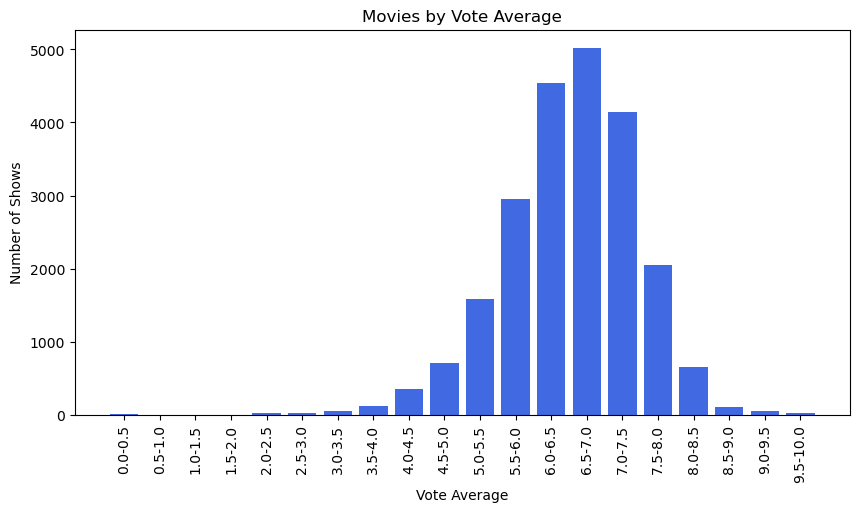

In [11]:
# Bin the vote_average values
bins = np.arange(0, 10.5, 0.5)
labels = [f'{x}-{x+0.5}' for x in bins[:-1]]
movies['vote_average_bins'] = pd.cut(movies['vote_average'], bins=bins, labels=labels, right=False)

# Count the number of shows in each bin
vote_counts = movies['vote_average_bins'].value_counts().sort_index()

# Set the figure size
plt.figure(figsize=(10, 5))  # Adjust the width and height values as desired

# Plot the histogram
plt.bar(vote_counts.index, vote_counts.values, color="royalblue")
plt.xlabel('Vote Average')
plt.ylabel('Number of Shows')
plt.title('Movies by Vote Average')

# Rotate x-labels
plt.xticks(rotation='vertical')

plt.savefig('../graphs/vote_average_histogram.png', dpi=800)
plt.show()

